#Pendahuluan

**Latar Belakang**  

Kesehatan darah merupakan salah satu indikator penting dalam menilai kondisi kesehatan individu. Pemeriksaan hematologi, yang mencakup analisis berbagai parameter darah seperti hematokrit, hemoglobin, eritrosit, leukosit, dan trombosit, digunakan secara luas dalam dunia medis untuk mendiagnosis berbagai penyakit, seperti anemia, gangguan pembekuan darah, infeksi, hingga kondisi kronis tertentu. Setiap parameter darah memberikan gambaran unik tentang fungsi tubuh, baik dari aspek transportasi oksigen, kekebalan tubuh, maupun kemampuan regenerasi sel.  

Dalam dunia medis modern, analisis data hematologi menjadi semakin penting untuk mendukung diagnosis berbasis bukti dan pengambilan keputusan yang cepat. Dengan kemajuan teknologi, dataset hematologi yang besar dapat digunakan untuk membangun model prediktif berbasis data yang dapat membantu dalam identifikasi dini berbagai penyakit. Misalnya, perbedaan kadar hemoglobin atau ukuran sel darah merah (MCV) dapat membantu mendeteksi jenis anemia tertentu, sementara jumlah trombosit dapat mengidentifikasi risiko gangguan pembekuan.  

Dataset yang digunakan dalam penelitian ini memuat berbagai parameter hematologi seperti hematokrit, hemoglobin, eritrosit, leukosit, trombosit, serta variabel demografis seperti usia dan jenis kelamin. Dataset ini juga menyertakan label sumber (source) yang kemungkinan mengindikasikan kondisi kesehatan atau kategori pasien tertentu (misalnya, pasien sehat vs pasien dengan penyakit). Analisis terhadap dataset ini berpotensi memberikan pemahaman yang lebih mendalam terkait hubungan antarparameter hematologi serta relevansinya dengan kondisi klinis.

**Metode Analisis**

Pada Analisis dataset ini digunakan metode `support Vector Machine (SVM)` untuk menentukan klasifikasi yang tepat untuk mengindikasikan kelainan pada seseorang berdasarkan hasil uji tes daranya

Support Vector Machine (SVM) adalah metode yang cocok untuk dataset hematologi ini karena kemampuannya menangani data berdimensi tinggi dan mendeteksi pola non-linear. SVM bekerja dengan mencari hyperplane yang memisahkan kelas data (misalnya, `SOURCE` sebagai target) dengan margin maksimum, sehingga menghasilkan model yang robust, terutama pada dataset kecil hingga sedang seperti ini. Dengan kernel trick, SVM dapat menangani hubungan non-linear antara variabel, misalnya pengaruh kombinasi parameter darah seperti `HAEMOGLOBINS`, `ERYTHROCYTE`, dan `THROMBOCYTE` terhadap label.

#Import Library dan Dataset

Pada bagian ini digunakan 3 library yang digunakan untuk mengolah data. Berikut library yang digunakan:
- `Numpy`: adalah library yang digunakan untuk komputasi numerik dan operasi matematis dengan array multidimensi yang efisien, termasuk aljabar linear, statistik, dan transformasi Fourier.
- `Pandas`: berfungsi untuk manipulasi dan analisis data berbentuk tabel (dataframe), memungkinkan pengelolaan data dari berbagai format seperti CSV atau Excel, serta menyediakan alat untuk pembersihan dan analisis data yang kompleks.
- `matplotlib.pyplot`: adalah library untuk membuat visualisasi data, seperti grafik garis, batang, scatter, atau histogram, yang memungkinkan penyajian data secara visual dengan pengaturan tampilan yang fleksibel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Datasets/treatment data.csv')
data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


Hasil output kode `data.head()` ini menunjukkan data teratas dari dataset yang dimiliki. Dalam keadaan default, kode `data.head()` akan menampilkan 5 data teratas pada dataset

#Preprocessing and Data Split
Pada bagian ini, kita melakukan beberapa preprocessing data untuk mempersiapkan data yang kita miliki agar siap diolah dan masuk ke model yang ingin digunakan.


1. **Import Library**:
- `train_test_split`: Untuk membagi dataset menjadi data latih dan data uji.
- `SVC`: Algoritma Support Vector Classifier dari Scikit-learn.
- `StandardScaler`: Untuk standarisasi data agar memiliki rata-rata 0 dan standar deviasi 1.
- `LabelEncoder`: Untuk mengubah data kategori menjadi numerik.

2. **Definisi Variabel Input dan Output**:
- **`X`**: Data fitur independen, yaitu kolom numerik dan kategori seperti *HAEMATOCRIT*, *HAEMOGLOBINS*, *ERYTHROCYTE*, *AGE*, dan *SEX*.
- **`Y`**: Data target atau label yang ingin diprediksi (kolom *SOURCE*).

3. **Split Dataset**:
- `train_test_split` membagi dataset menjadi 70% data latih (`X_train`, `Y_train`) dan 30% data uji (`X_test`, `Y_test`).
- Parameter `random_state=42` memastikan pembagian data tetap konsisten setiap kali dijalankan.

4. **Encoding Data Kategori**:
- Kolom `SEX` adalah data kategori.
- **Latih**: `LabelEncoder.fit_transform` mengubah data kategori pada `X_train` menjadi numerik.
- **Uji**: `LabelEncoder.transform` memastikan data uji menggunakan pola yang sama seperti data latih.

5. **Standarisasi Data**:
- **Latih**: `StandardScaler.fit_transform` menstandarisasi fitur pada `X_train` agar data memiliki skala seragam.
- **Uji**: `StandardScaler.transform` menerapkan skala yang sama pada `X_test` untuk menjaga konsistensi.

Hal ini diperuntukkan agar model bisa berjalan lebih baik karena data telah dipersiapkan berdasarkan kebutuhan algoritma model

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data[['HAEMATOCRIT', 'HAEMOGLOBINS',"ERYTHROCYTE","LEUCOCYTE","THROMBOCYTE","MCH","MCHC","MCV","AGE","SEX"]]
Y = data['SOURCE']

# Split data first
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Inisialisasi LabelEncoder
le = LabelEncoder()
# Fit and transform on the training data only to avoid data leakage
X_train['SEX'] = le.fit_transform(X_train['SEX'])
X_test['SEX'] = le.transform(X_test['SEX'])

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Kernel**

Pada model `Support Vector Machine`, kernel yang digunakan adalah kernel `rbf`. Setelah diuji menggunakan beberapa kernel, ditemukan bahwa kernel `rbf` memiliki akurasi model yang paling tinggi

In [3]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

# kernel:
# linear = 0,716
# poly = 0,74
# rbf = 0,78
# sigmoid = 0,60

SVC(random_state=0)

#Model Evaluation with Data Training

Pada bagian ini, data yang dimiliki akan dibuatkan model menggunakan data training yang telah dipisahkan sebelumnya

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

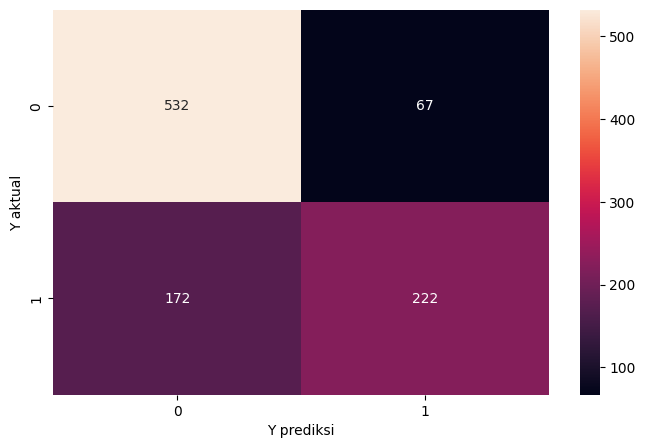

In [5]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y prediksi")
plt.ylabel("Y aktual")
plt.show()

Diatas merupakan visualisasi dari confusion matrix yang terbentuk dengan menggunakan data test dan prediksi.

**Accuracy, Recall, Precission, and F1 Score**

Berdasarkan confusion matrix yang didapatkan, kita selanjutnya menghitung nilai akurasi, recall, presisi, dan F1 score dari confusion matrix yang didapatkan. `Confusion Matrix` adalah alat evaluasi yang digunakan untuk menilai kinerja model klasifikasi dengan membandingkan hasil prediksi model terhadap data yang sebenarnya. Matrix ini memberikan gambaran rinci tentang prediksi model, baik yang benar maupun yang salah

In [6]:
accuracy = accuracy_score(Y_test, Y_pred)
recall = 222/(222+67)
precis = 222/(222+172)
f1 = 2*(recall*precis)/(recall+precis)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precis: ", precis)
print("F1 Score: ", f1)

Accuracy:  0.7593152064451159
Recall:  0.7681660899653979
Precis:  0.5634517766497462
F1 Score:  0.6500732064421669


Berikut adalah penjelasan dari hasil confusion matrix:

### 1. **Accuracy: 0.759**
   - Model berhasil melakukan prediksi yang benar sekitar **75.93%** dari total prediksi yang dibuat. Meskipun accuracy memberikan gambaran umum yang baik, namun bisa menyesatkan jika data tidak seimbang (misalnya, lebih banyak kelas negatif).

### 2. **Recall: 0.768**
   - Model berhasil mendeteksi sekitar **76.82%** dari seluruh data yang benar-benar positif (yaitu, model tidak melewatkan banyak data positif). Nilai recall yang tinggi menunjukkan model cukup baik dalam menangani kelas positif, meskipun mungkin menghasilkan beberapa false positives.

### 3. **Precision: 0.563**
   - Dari seluruh prediksi yang dilakukan untuk kelas positif, hanya **56.35%** yang benar-benar positif. Artinya, model menghasilkan cukup banyak false positives (prediksi positif yang salah). Precision yang lebih rendah menunjukkan adanya ketidaktepatan dalam prediksi positif.

### 4. **F1 Score: 0.650**
   - Nilai **0.650** menunjukkan keseimbangan antara precision dan recall. F1 score yang lebih tinggi menunjukkan bahwa model memiliki performa yang baik dalam mendeteksi kelas positif tanpa menghasilkan terlalu banyak false positives. Namun, ada ruang untuk perbaikan agar mencapai performa yang lebih seimbang.

#Underfitting & Overfitting

Pada bagian ini, kita akan memeriksa model yang kita buat. Apakah model tersebut sudah memprediksi dengan baik atau menghasilkan hasil prediksi yang overfitting dan model yang dihasilkan tidak akan akurat jika digunakan di dataset yang lain.

In [7]:
Y_pred_train = classifier.predict(X_train)
Y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

Hasil Y_pred_train memungkinkan Anda mengukur seberapa baik model mengenali pola pada data pelatihan sebelum diuji pada data validasi atau data uji.

In [8]:
cm_train = confusion_matrix(Y_train, Y_pred_train)

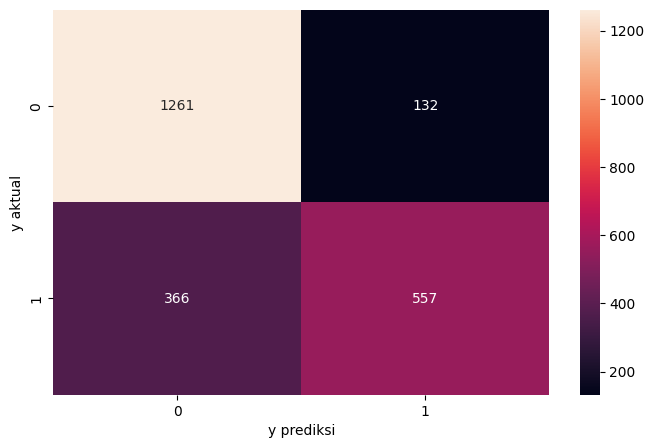

In [9]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_train, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [10]:
accuracy_train = accuracy_score(Y_train, Y_pred_train)
print ("Accuracy: ", accuracy_train)

Accuracy:  0.7849740932642487


Setelah diuji menggunakan data hasil prediksi, didapati akurasi dari model sebedsar **0,784**. Hal tersebut merupakan akurasi yang cukup baik dalam memprediksi model.

**Kurva ROC**

Kurva ROC (Receiver Operating Characteristic) adalah alat yang digunakan untuk mengevaluasi performa model klasifikasi, terutama dalam masalah klasifikasi biner. Kurva ini menunjukkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai nilai ambang batas (threshold). Kurva ini berfungsi untuk mengevaluasi performa model yang dibuat.

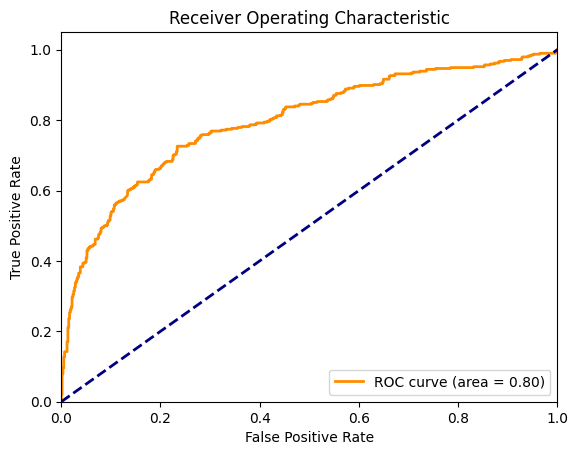

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42, probability=True)
classifier.fit(X_train, Y_train)
Y_pred_prob = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Kurva ROC yang dihasilkan menunjukkan bahwa model klasifikasi memiliki kemampuan yang cukup baik dalam membedakan antara kelas positif dan negatif, dengan nilai **Area Under the Curve (AUC)** sebesar **0.80**. Hal ini menunjukkan bahwa model dapat mengidentifikasi kelas dengan akurasi yang lebih tinggi dibandingkan dengan tebak-tebakan acak, yang ditunjukkan oleh garis diagonal biru (AUC = 0.5). Kurva ROC mendekati sudut kiri atas, yang mengindikasikan bahwa model mampu mempertahankan tingkat **True Positive Rate (TPR)** yang tinggi sambil menjaga **False Positive Rate (FPR)** tetap rendah pada beberapa ambang batas. Meskipun performanya sudah baik, model masih dapat ditingkatkan dengan optimasi hyperparameter, peningkatan kualitas atau kuantitas data pelatihan, atau penanganan khusus pada data tidak seimbang jika diperlukan.

#Kesimpulan

Berdasarkan hasil analisis model yang dibuat, terlihat bahwa model yang dibuat sudah cukup baik dalam meprediksi. Namun, model masih bisa ditingkatkan dengan memperhatikan data yang digunakan. Diketahui data memiliki distribusi yang tidak normal dan hal tersebut bisa mempengaruhi kinerja model yang dibuat.